In [1]:
import pandas as pd
import numpy as np

import networkx as nx
import matplotlib.pyplot as plt

import os

In [2]:
df1 = pd.read_csv(os.getcwd() + '\\..\\data\\Batangas.csv')
df2 = pd.read_csv(os.getcwd() + '\\..\\data\\laguna.csv')
df2['description'] = df2['description_1'] + ' ' + df2['description_2'] + ' ' + df2['description_3']
df3 = pd.read_csv(os.getcwd() + '\\..\\data\\Quezon.csv')

df = pd.concat([df1, df2, df3])

df.reset_index(drop=True, inplace=True)

df.head()

,Location,description_1,description_2,description_3,description
0,Laiya Beach and Resorts,Laiya Beach and Resorts Probably one of the mo...,"Laiya Aplaya, or simply Laiya, is another seas...",Laiya in Batangas reigns supreme when it comes...,Laiya Beach and Resorts Probably one of the mo...
1,Verde Island,Verde Island Verde Island is one of the emergi...,"Verde Island, also called Isla Verde, is nestl...",If you want to reward yourself from your hard ...,Verde Island Verde Island is one of the emergi...
2,Taal Heritage Town,Taal Heritage Town One of the most popular thi...,Taal was originally located in what is now the...,The most interesting part of going around Taal...,Taal Heritage Town One of the most popular thi...
3,Nasugbu Beaches and Resorts,Nasugbu Beaches and Resorts Located in the wes...,One of the areas in Batangas that had an early...,Nasugbu soon gained popularity over the years ...,Nasugbu Beaches and Resorts Located in the wes...
4,Cintai Corito's Garden,Cintai Corito's Garden Built by the love of a ...,"Sprawled in a seven-hectare property, Cintai C...",Cintai Corito's Garden is a Balinese-inspired ...,Cintai Corito's Garden Built by the love of a ...


In [17]:
df.to_csv('consolidated.csv', index=False)

# Making Network

[0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.9, 0.9, 0.9, 0.9, 0.9, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.9, 0.9, 0.9, 0.9, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,

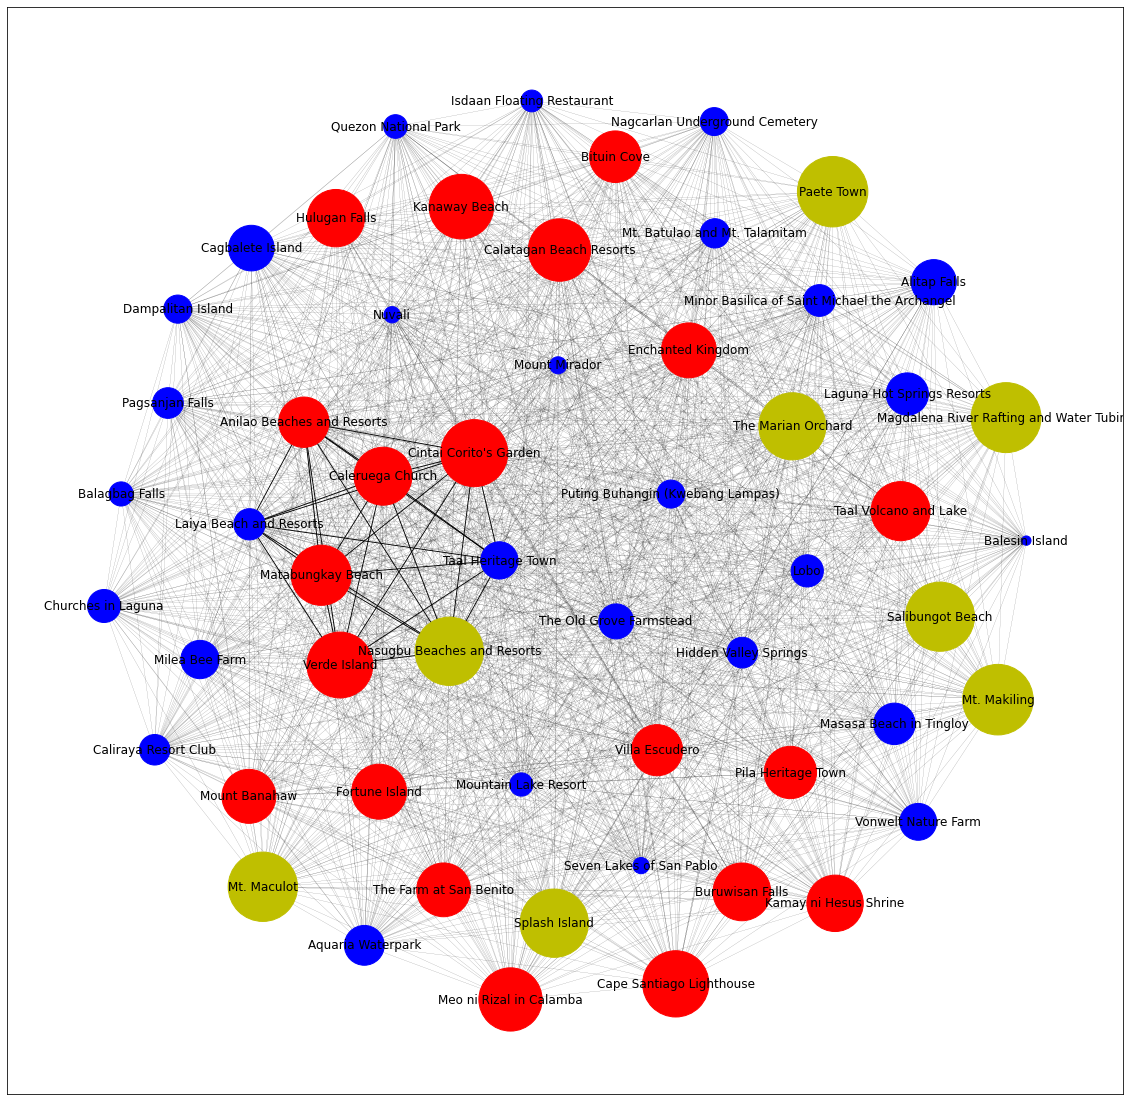

In [6]:
import random

place_list = list(df['Location'])

G = nx.Graph()

sample_importance = []
for place in place_list:
    sample_importance.append(random.random()* 5000)

importance_pair = []
for i in range(len(place_list)):
    importance_pair.append((place_list[i], sample_importance[i]))

importance_best = list(filter(lambda x: x[1] > 4500, importance_pair))

edge_best = []
for place1 in range(len(importance_best)):
    for place2 in range(place1+1, len(importance_best)):
        if place_list[place1] == place_list[place2]:
            continue
        else:
            edge_best.append((place_list[place1], place_list[place2]))

for place in place_list:
    G.add_node(place)

for place1 in place_list:
    for place2 in place_list:
        if place1 == place2:
            continue
        else:
            if (place1, place2) in edge_best:
                G.add_edge(place1, place2, weight=0.9)
            else:
                G.add_edge(place1, place2, weight=0.1)

edges = G.edges()

for edge in edges:
    if edge in edge_best:
        G[edge[0]][edge[1]]['weight'] = 0.9

weights = [G[u][v]['weight'] for u,v in edges]

print(weights)

colors = []
for val in sample_importance:
    if val > 4500:
        colors.append('y')
    elif val > 2500:
        colors.append('r')
    else:
        colors.append('b')

plt.figure(figsize=(20,20))
nx.draw_networkx(G, width=weights, node_size=sample_importance, node_color=colors)

In [55]:
G.edges()

EdgeView([('Laiya Beach and Resorts', 'Verde Island'), ('Laiya Beach and Resorts', 'Taal Heritage Town'), ('Laiya Beach and Resorts', 'Nasugbu Beaches and Resorts'), ('Laiya Beach and Resorts', "Cintai Corito's Garden"), ('Laiya Beach and Resorts', 'Anilao Beaches and Resorts'), ('Laiya Beach and Resorts', 'Caleruega Church'), ('Laiya Beach and Resorts', 'Matabungkay Beach'), ('Laiya Beach and Resorts', 'The Marian Orchard'), ('Laiya Beach and Resorts', 'Masasa Beach in Tingloy'), ('Laiya Beach and Resorts', 'Milea Bee Farm'), ('Laiya Beach and Resorts', 'Taal Volcano and Lake'), ('Laiya Beach and Resorts', 'Cape Santiago Lighthouse'), ('Laiya Beach and Resorts', 'The Old Grove Farmstead'), ('Laiya Beach and Resorts', 'Mt. Batulao and Mt. Talamitam'), ('Laiya Beach and Resorts', 'Lobo'), ('Laiya Beach and Resorts', 'Fortune Island'), ('Laiya Beach and Resorts', 'Calatagan Beach Resorts'), ('Laiya Beach and Resorts', 'The Farm at San Benito'), ('Laiya Beach and Resorts', 'Mt. Maculot'),

In [46]:
edge_width

[0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1